Switiching notebook to R

In [ ]:
%load_ext rpy2.ipython

Downloading ANES csv file from google drive

In [ ]:
!gdown --id 1JEx2DhBaXEzUUD7Ka6HtNLC2QN_De5PO

Downloading...
From: https://drive.google.com/uc?id=1JEx2DhBaXEzUUD7Ka6HtNLC2QN_De5PO
To: /content/anes_timeseries_2020_csv_20210719.csv
100% 39.7M/39.7M [00:00<00:00, 194MB/s] 


Installing packages

In [ ]:
%%R

install.packages("stargazer")
install.packages("survey")
install.packages("fastDummies")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/stargazer_5.2.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 311587 bytes (304 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

Loading dplyr and ggplot2, reading data into R

In [ ]:
%%R

library(dplyr)
library(ggplot2)
library(survey)
library(stargazer)
library(fastDummies)
library(haven)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: grid

R[write to console]: Loading required package: Matrix

R[write to console]: Loading required package: survival

R[write to console]: 
Attaching package: ‘survey’


R[write to console]: The following object is masked from ‘package:graphics’:

    dotchart


R[write to console]: 
Please cite as: 


R[write to console]:  Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

R[write to console]:  R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




# 2020 Data

In [ ]:
%%R

df <- read.csv('/content/anes_timeseries_2020_csv_20210719.csv')

Selecting and renaming the relevant variables

In [ ]:
%%R

df_clean <- df %>% select(prevote_weight =  V200010a, # Pre-election weight
                          attention = V201005, # How often do you pay attention to what’s going on in government and politics?
                          state_reg = V201013a, # State of registration
                          party_reg = V201018, # What political party are you registers with, if any?
                          prevote_choice = V201033, # Who do you think you will vote for?
                          dem_rate = V201156, # How would you rate the Democratic Party?
                          rep_rate = V201157, # How would you rate the Republican Party?
                          dem_like = V201158, # Is there anything in particular that you like about the Democratic Party?
                          dem_dislike = V201160, # Is there anything in particular that you don’t like about the Democratic Party?
                          rep_like = V201162, # Is there anything in particular that you like about the Republican Party?
                          rep_dislike = V201164, # Is there anything in particular that you don't like about the Republican Party?
                          self_scale = V201200, # Where would you place yourself on this scale, or haven’t you thought much about this?
                          liberal_conservative = V201201, # If you had to choose, would you consider yourself a liberal or a conservative?
                          dem_party_scale = V201206, # Where would you place the Democratic Party on this scale?
                          rep_party_scale = V201207, # Where would you place the Republican Party on this scale?
                          party_id= V201228, # Generally speaking, do you usually think of yourself as Democrat, Republic, an independent, or what?
                          party_spectrum = V201231x, # Party ID Summary
                          prevote_count_acc = V201351, # In the November 2020 election, how accurately do you think the votes will be counted?
                          prevote_trust = V201352, # How much do you trust the officials who oversee elections where you live?
                          age = V201507x, # Age
                          race = V201549x, # Race Summary
                          sex = V201600, # What is your sex?
                          postvote_weight = V200010b, # Post-election weight
                          stat_reg = V202054a, # State registered
                          party_reg_post = V202064, # What political party are you registers with, if any?
                          lib_rate= V202161, # How would you rate: liberals
                          con_rate = V202164, # How would you rate: conservatives
                          fair = V202219, # In your view, how often do the following things occur in this country’s elections: votes are counted fairly?
                          dem_rate10 = V202433, # Rate Democratic Party
                          rep_rate10 = V202434, # Rate Republican Party
                          educ = V201511x, # Education Summary
                          stratum = V200010d, # Strata to use wwith weights
                          cluster = V200010c #Cluster id(psu) that goes with strata and weights
                          )

In [ ]:
%%R

summary(df_clean)

 prevote_weight     attention        state_reg        party_reg      
 Min.   :0.0265   Min.   :-9.000   Min.   :-1.000   Min.   :-9.0000  
 1st Qu.:0.4465   1st Qu.: 2.000   1st Qu.:-1.000   1st Qu.:-1.0000  
 Median :0.7366   Median : 2.000   Median :-1.000   Median : 1.0000  
 Mean   :1.0000   Mean   : 2.312   Mean   : 1.911   Mean   : 0.5685  
 3rd Qu.:1.2365   3rd Qu.: 3.000   3rd Qu.:-1.000   3rd Qu.: 2.0000  
 Max.   :6.9329   Max.   : 5.000   Max.   :99.000   Max.   : 5.0000  
                                                                     
 prevote_choice      dem_rate         rep_rate         dem_like     
 Min.   :-9.000   Min.   : -9.00   Min.   : -9.00   Min.   :-9.000  
 1st Qu.: 1.000   1st Qu.: 15.00   1st Qu.: 15.00   1st Qu.: 1.000  
 Median : 1.000   Median : 50.00   Median : 40.00   Median : 1.000  
 Mean   : 1.165   Mean   : 44.75   Mean   : 43.13   Mean   : 1.454  
 3rd Qu.: 2.000   3rd Qu.: 70.00   3rd Qu.: 70.00   3rd Qu.: 2.000  
 Max.   :12.000   Max.   :

Here I filter the data to only include those who reposnded to the question on whether they think votes are counted fairly and anyone who does not identify as republican or independent.

Then I calculate the difference between in-group and out-group rating and make a dummy variable to indicate those who do not believe that the votes were counted fairly.

In [ ]:
%%R

df_clean2 <- df_clean %>% filter(fair >= 1 & fair <= 5 &
                                 party_id >=1 & party_id <= 2) %>%
  mutate(dem_rate_clean = case_when(dem_rate >= 0 & dem_rate <= 100 ~ dem_rate,
                                    TRUE ~ NA_integer_),
         rep_rate_clean = case_when(rep_rate >= 0 & rep_rate <= 100 ~ rep_rate,
                                    TRUE ~ NA_integer_),
         aff_polar = case_when(party_id == 1 ~ dem_rate_clean - rep_rate_clean,
                               party_id == 2 ~ rep_rate_clean - dem_rate_clean),
         fair_dummy = case_when(fair == 4 | fair == 5 ~ 1,
                                    TRUE ~ 0)
)

Transforming variables into factors

In [ ]:
%%R

df_clean2$fair <- df_clean2$fair %>% as.factor()
df_clean2$fair_dummy <- df_clean2$fair_dummy %>% as.factor()

Looking at the fair variable, most respondents fall into categories 1 or 2 which mean they believe votes are counted all of the time or most of the time respectively.

In [ ]:
%%R

print(table(df_clean2$fair))


   1    2    3    4    5 
1448 2024  450  658  286 


Looking at affective polarization by group.

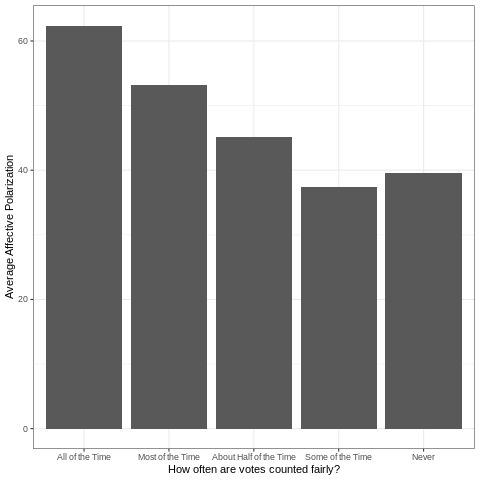

In [ ]:
%%R

hist_data <- df_clean2 %>%
  filter(party_id == 1) %>%
  group_by(fair) %>%
  summarize(Mean_polar = mean(aff_polar, na.rm=TRUE))

ggplot(hist_data, aes(x = fair, y = Mean_polar)) +
  geom_histogram(stat = 'identity') +
  xlab('How often are votes counted fairly?') + 
  ylab('Average Affective Polarization') +
  scale_x_discrete(limit = c("1", "2", "3", "4", "5"),
                   labels = c("All of the Time", "Most of the Time", 
                              "About Half of the Time", "Some of the Time", 
                              "Never")) +
  theme_bw()

Based on the ANOVA test we can reject the hypothesis that the mean for each group is equivalent.

In [ ]:
%%R

anova <- aov(aff_polar ~ fair, data = df_clean2)
summary(anova)

              Df  Sum Sq Mean Sq F value Pr(>F)    
fair           4  113753   28438   28.51 <2e-16 ***
Residuals   4795 4782689     997                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
66 observations deleted due to missingness


The affective polarization variable on its own is significant.

In [ ]:
%%R

full_design <- svydesign(ids = ~fair,
                         psu = ~cluster,
                         strata = ~stratum,
                         weights = ~postvote_weight,
                         data = df_clean2, 
                         nest = TRUE)

svylog_reg <- svyglm(fair_dummy ~ aff_polar, design = full_design, family = 'quasibinomial')
summary(svylog_reg)


Call:
svyglm(formula = fair_dummy ~ aff_polar, design = full_design, 
    family = "quasibinomial")

Survey design:
svydesign(ids = ~fair, psu = ~cluster, strata = ~stratum, weights = ~postvote_weight, 
    data = df_clean2, nest = TRUE)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.773292   0.212345  -8.351 1.14e-14 ***
aff_polar    0.007872   0.001938   4.062 6.99e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 1.013236)

Number of Fisher Scoring iterations: 4



After running a logistic regression we can interpret the coefficients.

The coefficients represent log-odds given by the following formula, $log(\frac{p}{1 -p})$ in which p is the probability that y = 1.  In this case y = 1 means that the repsondent does not think the election votes are counted fairly. 

Below I convert the coefficient from log-odds to probability so that it is more easily interpreted. I compare the affective polarization value of 0 (least polarized) and 100 (most polarized). The expected change in odds between someone with a polarized value of 0 in 100 is 2.197. This means that the odds of someone who is the most polarized is expected to have 2.197 times higher odds not trusting the elections results.

We can also convert odds to probability. Probability 1 represents the probability that someone who is the least polarized would not trust the election results (0.145) while probability two is the probability that somebody who is the most polarized would not trust election results (0.27). For reference, 19% of respondents overall did not trust the results of the election.

More info on interpretation: https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [ ]:
%%R

intercept <- coef(svylog_reg)[1]
polar_coef <- coef(svylog_reg)[2]

one <- intercept + polar_coef*0
two <- intercept + polar_coef*100

print(paste("The expected change in odds is", exp(two - one)))

print(paste("Probability 1:", exp(one)/(1 + exp(one))))
print(paste("Probability 2:", exp(two)/(1 + exp(two))))

[1] "The expected change in odds is 2.19715359107128"
[1] "Probability 1: 0.145133456463798"
[1] "Probability 2: 0.271677358553361"


Changing all -9 values to NA.

In [ ]:
%%R

df_clean2 <- df_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -9)))


df_clean2 <- df_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -8)))


df_clean2 <- df_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -2)))

Converting control variables to factors.

In [ ]:
%%R

cols <- c('sex', 'race', 'party_id', 'educ')
df_clean2[cols] <- lapply(df_clean2[cols], factor)

Creating dummy variables for the control variables since svyglm does not recognize factors as categorical variables

In [ ]:
%%R

df_clean2 <- dummy_cols(df_clean2, select_columns = cols)

Running a logistic regression with all the control variables. Most variables have a significant relationship with perception of fairness.

More info on assessing model fit: https://www.statology.org/null-residual-deviance/

In [ ]:
%%R

full_design <- svydesign(ids = ~fair,
                         psu = ~cluster,
                         strata = ~stratum,
                         weights = ~postvote_weight,
                         data = df_clean2, 
                         nest = TRUE)

svylog_reg2 <- svyglm(fair_dummy ~ aff_polar + party_id_2 + educ_2 + educ_3 + 
                      educ_4 + educ_5 + race_2 + race_3 + race_4 + race_5 + race_6 +
                      age + sex_2, design = full_design, family = 'quasibinomial')
summary(svylog_reg2)


Call:
svyglm(formula = fair_dummy ~ aff_polar + party_id_2 + educ_2 + 
    educ_3 + educ_4 + educ_5 + race_2 + race_3 + race_4 + race_5 + 
    race_6 + age + sex_2, design = full_design, family = "quasibinomial")

Survey design:
svydesign(ids = ~fair, psu = ~cluster, strata = ~stratum, weights = ~postvote_weight, 
    data = df_clean2, nest = TRUE)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.653450   0.451365  -3.663 0.000324 ***
aff_polar    0.006108   0.002016   3.030 0.002793 ** 
party_id_2   2.075561   0.185970  11.161  < 2e-16 ***
educ_2      -0.625532   0.291236  -2.148 0.033012 *  
educ_3      -0.843267   0.270652  -3.116 0.002124 ** 
educ_4      -1.338877   0.290476  -4.609 7.47e-06 ***
educ_5      -1.582437   0.307668  -5.143 6.78e-07 ***
race_2       0.442842   0.266287   1.663 0.097983 .  
race_3       0.374768   0.215861   1.736 0.084184 .  
race_4      -0.422746   0.444819  -0.950 0.343146    
race_5       0.325537   0.603145   0.54

After controlling for all the variables the effect of affective polarization is not as strong but still significant. The expected odds of someone who is the most polarized not trusting the election are 1.84 times higher than someone who is the least polarized (compared to 2.197 before adding in controls).

This indicates that some of the controls explain some of the difference in effect between affective polarization and perception of fairness but not all of the difference as the effect is still significant.

The reason I didn't calculate the predicted probabilities here is that they are now different based on the other control variables. For example, the model's predicted probability of not trusting election results would now be different for a 40 year-old man compared to a 30 year-old women, even if they had the same level of affective polarization.

In [ ]:
%%R

intercept <- coef(svylog_reg2)[1]
polar_coef <- coef(svylog_reg2)[2]

one <-  polar_coef*0
two <- polar_coef*100

print(paste("The expected change in odds is", exp(two - one)))

[1] "The expected change in odds is 1.84189842938977"


# 2016 Data

In [ ]:
!gdown --id 1L2qNPPiabFVyynYShpwsQq6aTb49s9xB

Downloading...
From: https://drive.google.com/uc?id=1L2qNPPiabFVyynYShpwsQq6aTb49s9xB
To: /content/anes_timeseries_2016.dta
100% 36.7M/36.7M [00:00<00:00, 238MB/s]


In [ ]:
%%R

df16 <- read_dta('/content/anes_timeseries_2016.dta')
write.csv(df16, file = '/content/anes_timeseries_2016.csv')
df16 <- read.csv('/content/anes_timeseries_2016.csv')

Selecting and renaming the relevant variables

In [ ]:
%%R

df16_clean <- df16 %>% select(dem_rate = V161095, # How would you rate the Democratic Party? (0-100)
                              rep_rate = V161096, # How would you rate the Republican Party? (0-100)
                              party_id= V161155, # Generally speaking, do you usually think of yourself as Democrat, Republic, an independent, or what?
                              dem_rate10 = V162283, # Rate Democratic Party
                              rep_rate10 = V162284, # Rate Republican Party
                              fair = V162219, # In your view, how often do the following things occur in this country’s elections: votes are counted fairly? scale 1-5
                              age = V161267, # Age
                              race = V161310x, # Race Summary
                              sex = V161002, # What is your sex?
                              educ = V161270, # education level
                              stratum = V160201, # Strata to use with weights
                              cluster = V160202, # Cluster id(psu) that goes with strata and weights
                              postvote_weight = V160102 # Weight from anes_timeseries_2016_userguidecodebook.pdf for full sample
)

In [ ]:
%%R

summary(df16_clean)

    dem_rate         rep_rate         party_id    dem_rate10    
 Min.   :-99.00   Min.   :-99.00   Min.   :-9   Min.   :-9.000  
 1st Qu.: 16.25   1st Qu.: 15.00   1st Qu.: 1   1st Qu.: 0.000  
 Median : 50.00   Median : 49.00   Median : 2   Median : 5.000  
 Mean   : 45.81   Mean   : 40.69   Mean   : 2   Mean   : 3.185  
 3rd Qu.: 70.00   3rd Qu.: 60.00   3rd Qu.: 3   3rd Qu.: 7.000  
 Max.   :100.00   Max.   :100.00   Max.   : 5   Max.   :10.000  
   rep_rate10          fair              age             race       
 Min.   :-9.000   Min.   :-9.0000   Min.   :-9.00   Min.   :-2.000  
 1st Qu.: 0.000   1st Qu.: 1.0000   1st Qu.:33.00   1st Qu.: 1.000  
 Median : 4.000   Median : 2.0000   Median :49.00   Median : 1.000  
 Mean   : 3.107   Mean   : 0.9705   Mean   :47.92   Mean   : 1.787  
 3rd Qu.: 7.000   3rd Qu.: 2.0000   3rd Qu.:63.00   3rd Qu.: 2.000  
 Max.   :10.000   Max.   : 5.0000   Max.   :90.00   Max.   : 6.000  
      sex               educ          stratum          cluster

Here I filter the data to only include those who reposnded to the question on whether they think votes are counted fairly and anyone who does not identify as republican or independent.

Then I calculate the difference between in-group and out-group rating and make a dummy variable to indicate those who do not believe that the votes were counted fairly.

In [ ]:
%%R

df16_clean2 <- df16_clean %>% filter(fair >= 1 & fair <= 5 &
                                 party_id >=1 & party_id <= 2) %>%
  mutate(dem_rate_clean = case_when(dem_rate >= 0 & dem_rate <= 100 ~ dem_rate,
                                    TRUE ~ NA_integer_),
         rep_rate_clean = case_when(rep_rate >= 0 & rep_rate <= 100 ~ rep_rate,
                                    TRUE ~ NA_integer_),
         aff_polar = case_when(party_id == 1 ~ dem_rate_clean - rep_rate_clean,
                               party_id == 2 ~ rep_rate_clean - dem_rate_clean),
         fair_dummy = case_when(fair == 4 | fair == 5 ~ 1,
                                    TRUE ~ 0)
)

Transforming variables into factors

In [ ]:
%%R

df16_clean2$fair <- df16_clean2$fair %>% as.factor()
df16_clean2$fair_dummy <- df16_clean2$fair_dummy %>% as.factor()

Looking at the fair variable, most respondents fall into categories 1 or 2 which mean they believe votes are counted all of the time or most of the time respectively.

In [ ]:
%%R

print(table(df16_clean2$fair))


   1    2    3    4    5 
 440 1277  274  205   82 


Looking at affective polarization by group.

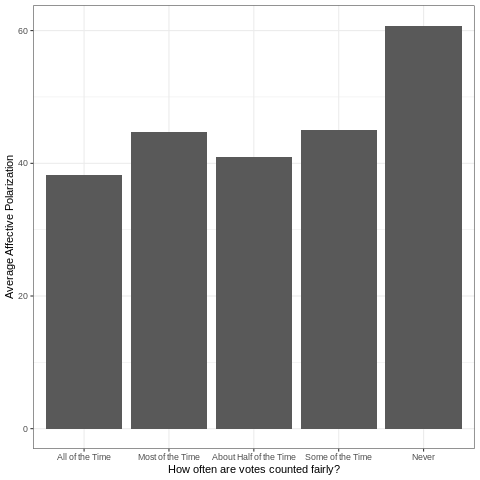

In [ ]:
%%R

hist_data16 <- df16_clean2 %>%
  filter(party_id == 2) %>%
  group_by(fair) %>%
  summarize(Mean_polar = mean(aff_polar, na.rm=TRUE))

ggplot(hist_data16, aes(x = fair, y = Mean_polar)) +
  geom_histogram(stat = 'identity') +
  xlab('How often are votes counted fairly?') + 
  ylab('Average Affective Polarization') +
  scale_x_discrete(limit = c("1", "2", "3", "4", "5"),
                   labels = c("All of the Time", "Most of the Time", 
                              "About Half of the Time", "Some of the Time", 
                              "Never")) +
  theme_bw()

Based on the ANOVA test we can reject the hypothesis that the mean for each group is equivalent.

In [ ]:
%%R

anova16 <- aov(aff_polar ~ fair, data = df16_clean2)
summary(anova16)

              Df  Sum Sq Mean Sq F value Pr(>F)
fair           4    5979    1495   1.456  0.213
Residuals   2243 2301965    1026               
30 observations deleted due to missingness


The affective polarization variable on its own is significant.

In [ ]:
%%R

full_design16 <- svydesign(ids = ~fair,
                         psu = ~cluster,
                         strata = ~stratum,
                         weights = ~postvote_weight,
                         data = df16_clean2, 
                         nest = TRUE)

svylog_reg16 <- svyglm(fair_dummy ~ aff_polar, design = full_design16, family = 'quasibinomial')
summary(svylog_reg16)


Call:
svyglm(formula = fair_dummy ~ aff_polar, design = full_design16, 
    family = "quasibinomial")

Survey design:
svydesign(ids = ~fair, psu = ~cluster, strata = ~stratum, weights = ~postvote_weight, 
    data = df16_clean2, nest = TRUE)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.105307   0.173532 -12.132   <2e-16 ***
aff_polar    0.005147   0.002579   1.996   0.0466 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 0.9985788)

Number of Fisher Scoring iterations: 4



After running a logistic regression we can interpret the coefficients.

The coefficients represent log-odds given by the following formula, $log(\frac{p}{1 -p})$ in which p is the probability that y = 1.  In this case y = 1 means that the repsondent does not think the election votes are counted fairly. 

Below I convert the coefficient from log-odds to probability so that it is more easily interpreted. I compare the affective polarization value of 0 (least polarized) and 100 (most polarized). The expected change in odds between someone with a polarized value of 0 in 100 is 1.673. This means that the odds of someone who is the most polarized is expected to have 1.673 times higher odds not trusting the elections results.

We can also convert odds to probability. Probability 1 represents the probability that someone who is the least polarized would not trust the election results (0.108) while probability two is the probability that somebody who is the most polarized would not trust election results (0.169).

More info on interpretation: https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [ ]:
%%R

intercept16 <- coef(svylog_reg16)[1]
polar_coef16 <- coef(svylog_reg16)[2]

one16 <- intercept16 + polar_coef16*0
two16 <- intercept16 + polar_coef16*100

print(paste("The expected change in odds is", exp(two16 - one16)))

print(paste("Probability 1:", exp(one16)/(1 + exp(one16))))
print(paste("Probability 2:", exp(two16)/(1 + exp(two16))))

[1] "The expected change in odds is 1.67312657113898"
[1] "Probability 1: 0.108582072587537"
[1] "Probability 2: 0.169297672267675"


Changing all -9 values to NA.

In [ ]:
%%R

df16_clean2 <- df16_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -9)))


df16_clean2 <- df16_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -8)))


df16_clean2 <- df16_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -7)))

df16_clean2 <- df16_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -6)))

df16_clean2 <- df16_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -99)))

Converting control variables to factors.

In [ ]:
%%R

cols <- c('sex', 'race', 'party_id', 'educ')
df16_clean2[cols] <- lapply(df16_clean2[cols], factor)

Creating dummy variables for the control variables since svyglm does not recognize factors as categorical variables

In [ ]:
%%R

df16_clean2 <- dummy_cols(df16_clean2, select_columns = cols)

Running a logistic regression with all the control variables. Most variables have a significant relationship with perception of fairness.

More info on assessing model fit: https://www.statology.org/null-residual-deviance/

In [ ]:
%%R

full_design <- svydesign(ids = ~fair,
                         psu = ~cluster,
                         strata = ~stratum,
                         weights = ~postvote_weight,
                         data = df16_clean2, 
                         nest = TRUE)

svylog_reg2 <- svyglm(fair_dummy ~ aff_polar + party_id_2 + educ_2 + educ_3 + 
                      educ_4 + educ_5 + race_2 + race_3 + race_4 + race_5 + race_6 +
                      age + sex_2, design = full_design, family = 'quasibinomial')
summary(svylog_reg2)


Call:
svyglm(formula = fair_dummy ~ aff_polar + party_id_2 + educ_2 + 
    educ_3 + educ_4 + educ_5 + race_2 + race_3 + race_4 + race_5 + 
    race_6 + age + sex_2, design = full_design, family = "quasibinomial")

Survey design:
svydesign(ids = ~fair, psu = ~cluster, strata = ~stratum, weights = ~postvote_weight, 
    data = df16_clean2, nest = TRUE)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.241350   0.329239  -3.770 0.000188 ***
aff_polar    0.003063   0.002668   1.148 0.251751    
party_id_2  -0.301945   0.201380  -1.499 0.134586    
educ_2      16.028543   1.027236  15.604  < 2e-16 ***
educ_3       0.427465   0.870851   0.491 0.623803    
educ_4       0.022491   0.885884   0.025 0.979758    
educ_5      -0.267976   0.841332  -0.319 0.750266    
race_2       1.439566   0.228724   6.294 8.35e-10 ***
race_3       0.153670   0.497130   0.309 0.757400    
race_4       1.770007   0.797834   2.219 0.027096 *  
race_5       0.651549   0.249113   2.

After controlling for all the variables the effect of affective polarization for 2016 is not statistically significant (p=0.2517). The expected odds of someone who is the most polarized not trusting the election are 1.35 times higher than someone who is the least polarized (compared to 1.67 before adding in controls).

This indicates that some of the controls explain some of the difference in effect between affective polarization and perception of fairness but not all of the difference as the effect is still significant.

The reason I didn't calculate the predicted probabilities here is that they are now different based on the other control variables. For example, the model's predicted probability of not trusting election results would now be different for a 40 year-old man compared to a 30 year-old women, even if they had the same level of affective polarization.

In [ ]:
%%R

intercept16 <- coef(svylog_reg2)[1]
polar_coef16 <- coef(svylog_reg2)[2]

one16 <-  polar_coef16*0
two16 <- polar_coef16*100

print(paste("The expected change in odds is", exp(two16 - one16)))

[1] "The expected change in odds is 1.35837943424463"


Plots

[1] "The mean affective polarization for Republicans in 2016 is"
[1] 43.33203


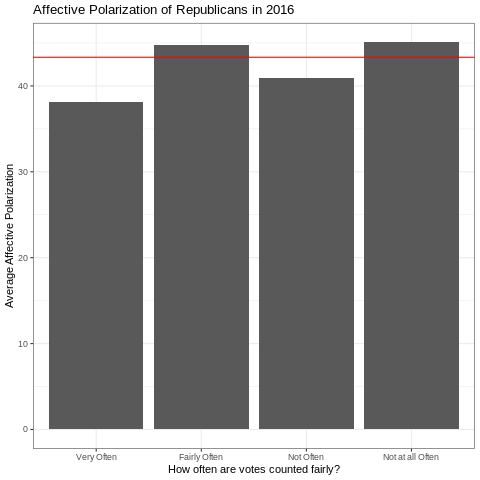

In [ ]:
%%R

df16_clean3 <- df16_clean2 %>% filter(party_id == 2) 
mur16 = mean(df16_clean3$aff_polar, na.rm=TRUE)
print('The mean affective polarization for Republicans in 2016 is')
print(mur16)

hist_data16rep <- df16_clean3 %>%
  group_by(fair) %>%
  summarize(Mean_polar = mean(aff_polar, na.rm=TRUE))

ggplot(hist_data16rep, aes(x = fair, y = Mean_polar)) +
  geom_histogram(stat = 'identity') +
  xlab('How often are votes counted fairly?') + 
  ylab('Average Affective Polarization') +
  ggtitle('Affective Polarization of Republicans in 2016') +
  geom_hline(yintercept=mur16, color='red') +
  scale_x_discrete(limit = c("1", "2", "3", "4"),
                   labels = c("Very Often", "Fairly Often", 
                              "Not Often", "Not at all Often")) +
  theme_bw()

[1] "The mean affective polarization for Democrats in 2016 is"
[1] 49.07781


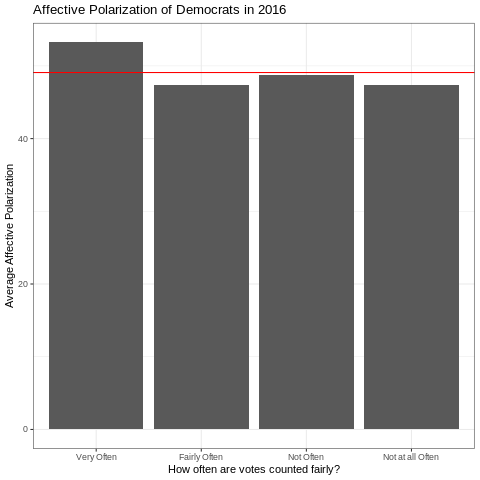

In [ ]:
%%R

df16_clean4 <- df16_clean2 %>% filter(party_id == 1) 
mud16 = mean(df16_clean4$aff_polar, na.rm=TRUE)
print('The mean affective polarization for Democrats in 2016 is')
print(mud16)

hist_data16dem <- df16_clean4 %>%
  group_by(fair) %>%
  summarize(Mean_polar = mean(aff_polar, na.rm=TRUE))

ggplot(hist_data16dem, aes(x = fair, y = Mean_polar)) +
  geom_histogram(stat = 'identity') +
  xlab('How often are votes counted fairly?') + 
  ylab('Average Affective Polarization') +
  ggtitle('Affective Polarization of Democrats in 2016') +
  geom_hline(yintercept=mud16, color='red') +
  scale_x_discrete(limit = c("1", "2", "3", "4"),
                   labels = c("Very Often", "Fairly Often", 
                              "Not Often", "Not at all Often")) +
  theme_bw()

In [ ]:
%%R

print(mean(df_clean2$aff_polar, na.rm=TRUE))
print(mean(df16_clean2$aff_polar, na.rm=TRUE))
print(mean(df12_clean2$aff_polar, na.rm=TRUE))

[1] 57.97604
[1] 46.45702
[1] 49.56957


# 2012 Data

In [ ]:
!gdown --id 1-ks3RJz9fX5ATJLM2gUz93M5iGUUBUMd

Downloading...
From: https://drive.google.com/uc?id=1-ks3RJz9fX5ATJLM2gUz93M5iGUUBUMd
To: /content/anes_timeseries_2012.dta
100% 56.5M/56.5M [00:00<00:00, 145MB/s]


In [ ]:
%%R

df12 <- read_dta('/content/anes_timeseries_2012.dta')
write.csv(df12, file = '/content/anes_timeseries_2012.csv')
df12 <- read.csv('/content/anes_timeseries_2012.csv')

Selecting and renaming the relevant variables

In [ ]:
%%R

df12_clean <- df12 %>% select(dem_rate = ft_dem, # How would you rate the Democratic Party? (0-100)
                              rep_rate = ft_rep, # How would you rate the Republican Party? (0-100)
                              party_id = pid_self, # Generally speaking, do you usually think of yourself as Democrat, Republic, an independent, or what?
                              dem_rate10 = cses_dptylike, # Rate Democratic Party
                              rep_rate10 = cses_rptylike, # Rate Republican Party
                              fair = electintpo_countfair, # In your view, how often do the following things occur in this country’s elections: votes are counted fairly? Scale 1-4
                              age = dem_age_r_x, # Age
                              race = dem_raceeth_x, # Race Summary
                              sex = gender_respondent_x, # What is your sex?
                              educ = dem_edugroup_x, # education level
                              stratum = strata_full,
                              cluster = psu_full,
                              postvote_weight = weight_full
)

In [ ]:
%%R

summary(df12_clean)

    dem_rate         rep_rate         party_id        dem_rate10    
 Min.   : -9.00   Min.   : -9.00   Min.   :-9.000   Min.   :-9.000  
 1st Qu.: 33.00   1st Qu.: 15.00   1st Qu.: 1.000   1st Qu.: 2.000  
 Median : 60.00   Median : 50.00   Median : 2.000   Median : 5.000  
 Mean   : 54.31   Mean   : 41.52   Mean   : 1.808   Mean   : 4.728  
 3rd Qu.: 80.00   3rd Qu.: 60.00   3rd Qu.: 3.000   3rd Qu.: 8.000  
 Max.   :100.00   Max.   :100.00   Max.   : 5.000   Max.   :10.000  
   rep_rate10          fair             age             race      
 Min.   :-9.000   Min.   :-9.000   Min.   :-2.00   Min.   :-9.00  
 1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.:35.00   1st Qu.: 1.00  
 Median : 4.000   Median : 2.000   Median :51.00   Median : 1.00  
 Mean   : 3.376   Mean   : 1.233   Mean   :48.92   Mean   : 2.04  
 3rd Qu.: 6.000   3rd Qu.: 2.000   3rd Qu.:62.00   3rd Qu.: 2.00  
 Max.   :10.000   Max.   : 4.000   Max.   :90.00   Max.   : 6.00  
      sex             educ           stratum    

Here I filter the data to only include those who reposnded to the question on whether they think votes are counted fairly and anyone who does not identify as republican or independent.

Then I calculate the difference between in-group and out-group rating and make a dummy variable to indicate those who do not believe that the votes were counted fairly.

In [ ]:
%%R

df12_clean2 <- df12_clean %>% filter(fair >= 1 & fair <= 4 &
                                 party_id >=1 & party_id <= 2) %>%
  mutate(dem_rate_clean = case_when(dem_rate >= 0 & dem_rate <= 100 ~ dem_rate,
                                    TRUE ~ NA_integer_),
         rep_rate_clean = case_when(rep_rate >= 0 & rep_rate <= 100 ~ rep_rate,
                                    TRUE ~ NA_integer_),
         aff_polar = case_when(party_id == 1 ~ dem_rate_clean - rep_rate_clean,
                               party_id == 2 ~ rep_rate_clean - dem_rate_clean),
         fair_dummy = case_when(fair == 3 | fair == 4 ~ 1,
                                    TRUE ~ 0)
)

Transforming variables into factors

In [ ]:
%%R

df12_clean2$fair <- df12_clean2$fair %>% as.factor()
df12_clean2$fair_dummy <- df12_clean2$fair_dummy %>% as.factor()

Looking at the fair variable, most respondents fall into categories 1 or 2 which mean they believe votes are counted all of the time or most of the time respectively. It is important to note that 2012 data only has 4 selections for this question, opposed to 5 selections for 2016 and 2020.

In [ ]:
%%R

print(table(df12_clean2$fair))


   1    2    3    4 
1142 1731  433  162 


Looking at affective polarization by group.

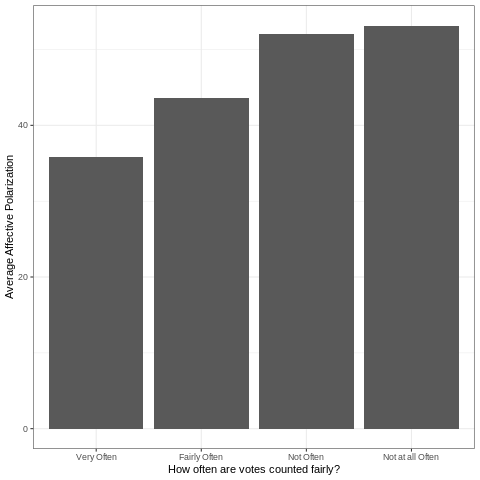

In [ ]:
%%R

hist_data12 <- df12_clean2 %>%
  filter(party_id == 2) %>%
  group_by(fair) %>%
  summarize(Mean_polar = mean(aff_polar, na.rm=TRUE))

ggplot(hist_data12, aes(x = fair, y = Mean_polar)) +
  geom_histogram(stat = 'identity') +
  xlab('How often are votes counted fairly?') + 
  ylab('Average Affective Polarization') +
  scale_x_discrete(limit = c("1", "2", "3", "4"),
                   labels = c("Very Often", "Fairly Often", 
                              "Not Often", "Not at all Often")) +
  theme_bw()

hypothesis that the mean for each group is equivalent.

In [ ]:
%%R

anova12 <- aov(aff_polar ~ fair, data = df12_clean2)
summary(anova12)

              Df  Sum Sq Mean Sq F value  Pr(>F)   
fair           3   15496    5165   5.075 0.00166 **
Residuals   3460 3521499    1018                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
4 observations deleted due to missingness


The affective polarization variable on its own is significant.

In [ ]:
%%R

full_design12 <- svydesign(ids = ~fair,
                         psu = ~cluster,
                         strata = ~stratum,
                         weights = ~postvote_weight,
                         data = df12_clean2, 
                         nest = TRUE)

svylog_reg <- svyglm(fair_dummy ~ aff_polar, design = full_design12, family = 'quasibinomial')
summary(svylog_reg)


Call:
svyglm(formula = fair_dummy ~ aff_polar, design = full_design12, 
    family = "quasibinomial")

Survey design:
svydesign(ids = ~fair, psu = ~cluster, strata = ~stratum, weights = ~postvote_weight, 
    data = df12_clean2, nest = TRUE)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -1.811500   0.893171  -2.028   0.0518 .
aff_polar    0.005731   0.002357   2.431   0.0214 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasibinomial family taken to be 1.003822)

Number of Fisher Scoring iterations: 4



After running a logistic regression we can interpret the coefficients.

The coefficients represent log-odds given by the following formula, $log(\frac{p}{1 -p})$ in which p is the probability that y = 1.  In this case y = 1 means that the repsondent does not think the election votes are counted fairly. 

Below I convert the coefficient from log-odds to probability so that it is more easily interpreted. I compare the affective polarization value of 0 (least polarized) and 100 (most polarized). The expected change in odds between someone with a polarized value of 0 in 100 is 1.773. This means that the odds of someone who is the most polarized is expected to have 1.773 times higher odds not trusting the elections results.

We can also convert odds to probability. Probability 1 represents the probability that someone who is the least polarized would not trust the election results (0.140) while probability two is the probability that somebody who is the most polarized would not trust election results (0.224). 

More info on interpretation: https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

In [ ]:
%%R

intercept12 <- coef(svylog_reg)[1]
polar_coef12 <- coef(svylog_reg)[2]

one12 <- intercept12 + polar_coef12*0
two12 <- intercept12 + polar_coef12*100

print(paste("The expected change in odds is", exp(two12 - one12)))

print(paste("Probability 1:", exp(one12)/(1 + exp(one12))))
print(paste("Probability 2:", exp(two12)/(1 + exp(two12))))

[1] "The expected change in odds is 1.7738392840295"
[1] "Probability 1: 0.140456994896833"
[1] "Probability 2: 0.224722761996689"


Changing all -9 values to NA.

In [ ]:
%%R

df12_clean2 <- df12_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -9)))


df12_clean2 <- df12_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -8)))


df12_clean2 <- df12_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -7)))

df12_clean2 <- df12_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -6)))

df12_clean2 <- df12_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -99)))

df12_clean2 <- df12_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -3)))

df12_clean2 <- df12_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -1)))

df12_clean2 <- df12_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -4)))

df12_clean2 <- df12_clean2 %>%
   mutate(across(where(is.integer), ~na_if(., -2)))



Converting control variables to factors.

In [ ]:
%%R

cols <- c('sex', 'race', 'party_id', 'educ')
df12_clean2[cols] <- lapply(df12_clean2[cols], factor)

Creating dummy variables for the control variables since svyglm does not recognize factors as categorical variables

In [ ]:
%%R

df12_clean2 <- dummy_cols(df12_clean2, select_columns = cols)


Running a logistic regression with all the control variables. Most variables have a significant relationship with perception of fairness.

More info on assessing model fit: https://www.statology.org/null-residual-deviance/

In [ ]:
%%R

full_design12 <- svydesign(ids = ~fair,
                         psu = ~cluster,
                         strata = ~stratum,
                         weights = ~postvote_weight,
                         data = df12_clean2, 
                         nest = TRUE)

svylog_reg2 <- svyglm(fair_dummy ~ aff_polar + party_id_2 + educ_2 + educ_3 + 
                      educ_4 + educ_5 + race_2 + race_3 + race_4 + race_5 + 
                      race_6 + age + sex_2, 
                      design = full_design12, family = 'quasibinomial')
summary(svylog_reg2)



Call:
svyglm(formula = fair_dummy ~ aff_polar + party_id_2 + educ_2 + 
    educ_3 + educ_4 + educ_5 + race_2 + race_3 + race_4 + race_5 + 
    race_6 + age + sex_2, design = full_design12, family = "quasibinomial")

Survey design:
svydesign(ids = ~fair, psu = ~cluster, strata = ~stratum, weights = ~postvote_weight, 
    data = df12_clean2, nest = TRUE)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.295513   0.922127  -1.405 0.178055    
aff_polar    0.006389   0.002421   2.639 0.017232 *  
party_id_2   0.674935   0.192744   3.502 0.002734 ** 
educ_2      -0.270492   0.138885  -1.948 0.068174 .  
educ_3      -0.670484   0.219099  -3.060 0.007083 ** 
educ_4      -1.594241   0.246386  -6.471 5.76e-06 ***
educ_5      -1.479696   0.332705  -4.447 0.000353 ***
race_2      -0.041867   0.213321  -0.196 0.846732    
race_3       0.716173   0.337382   2.123 0.048761 *  
race_4      -1.235005   0.593162  -2.082 0.052757 .  
race_5       0.216820   0.165316   

After controlling for all the variables the effect of affective polarization is stronger and more significant. The expected odds of someone who is the most polarized not trusting the election are 1.86 times higher than someone who is the least polarized (compared to 1.773 before adding in controls).

This indicates that some of the controls explain some of the difference in effect between affective polarization and perception of fairness but not all of the difference as the effect is still significant.

The reason I didn't calculate the predicted probabilities here is that they are now different based on the other control variables. For example, the model's predicted probability of not trusting election results would now be different for a 40 year-old man compared to a 30 year-old women, even if they had the same level of affective polarization.

In [ ]:
%%R

intercept <- coef(svylog_reg2)[1]
polar_coef <- coef(svylog_reg2)[2]

one <-  polar_coef*0
two <- polar_coef*100

print(paste("The expected change in odds is", exp(two - one)))

[1] "The expected change in odds is 1.89446668855509"


[1] "The mean affective polarization for Republicans in 2012 is"
[1] 43.23077


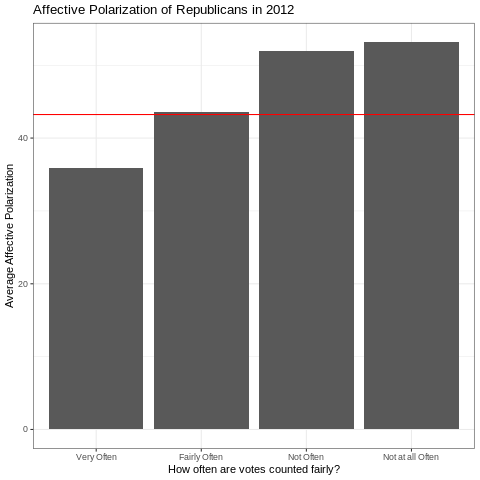

In [ ]:
%%R

df12_clean3 <- df12_clean2 %>% filter(party_id == 2) 
mur = mean(df12_clean3$aff_polar, na.rm=TRUE)
print('The mean affective polarization for Republicans in 2012 is')
print(mur)

hist_data12rep <- df12_clean3 %>%
  group_by(fair) %>%
  summarize(Mean_polar = mean(aff_polar, na.rm=TRUE))

ggplot(hist_data12rep, aes(x = fair, y = Mean_polar)) +
  geom_histogram(stat = 'identity') +
  xlab('How often are votes counted fairly?') + 
  ylab('Average Affective Polarization') +
  ggtitle('Affective Polarization of Republicans in 2012') +
  geom_hline(yintercept=mur, color='red') +
  scale_x_discrete(limit = c("1", "2", "3", "4"),
                   labels = c("Very Often", "Fairly Often", 
                              "Not Often", "Not at all Often")) +
  theme_bw()

[1] "The mean affective polarization for Democrats in 2012 is"
[1] 53.2485


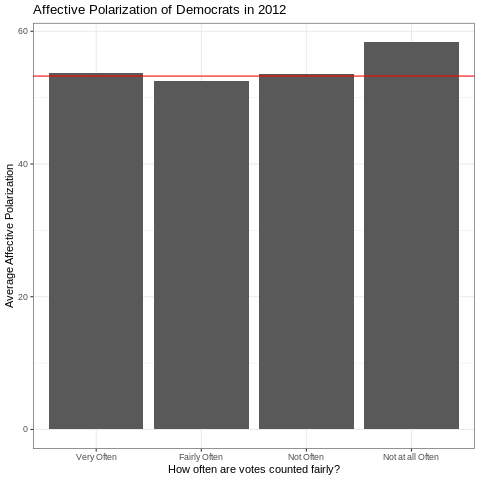

In [ ]:
%%R

df12_clean4 <- df12_clean2 %>% filter(party_id == 1) 

mud = mean(df12_clean4$aff_polar, na.rm=TRUE)
print('The mean affective polarization for Democrats in 2012 is')
print(mud)

hist_data12dem <- df12_clean4 %>%
  group_by(fair) %>%
  summarize(Mean_polar = mean(aff_polar, na.rm=TRUE))

ggplot(hist_data12dem, aes(x = fair, y = Mean_polar)) +
  geom_histogram(stat = 'identity') +
  xlab('How often are votes counted fairly?') + 
  ylab('Average Affective Polarization') + 
  ggtitle('Affective Polarization of Democrats in 2012') +
  geom_hline(yintercept=mud, color='red') +
  scale_x_discrete(limit = c("1", "2", "3", "4"),
                   labels = c("Very Often", "Fairly Often", 
                              "Not Often", "Not at all Often")) +
  theme_bw()